In [1]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import pandas as pd
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

C:\Anaconda2\envs\cnn2\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


# Utils 

In [2]:
def generate_batch(features, labels, batch_size):
    batch_indexes = np.random.random_integers(0, len(features) - 1, batch_size)
    batch_features = features[batch_indexes]
    batch_labels = labels[batch_indexes]
    return (batch_features, batch_labels)
#the following two fuctions help in reaading the data
def read_features_from_csv(filename,usecols = range(1, 785)):
    features = np.genfromtxt(filename, delimiter=',', skip_header=1, usecols=usecols, dtype=np.float32)
    features = np.divide(features, 255.0)
    return features

def read_labels_from_csv(filename):
    labels_original = np.genfromtxt(filename, delimiter=',', skip_header=1, usecols=0, dtype=np.int)
    labels = np.zeros([len(labels_original),10])
    labels[np.arange(len(labels_original)), labels_original] = 1
    labels = labels.astype(np.float32)
    return labels

# Read Data 

In [3]:
features = read_features_from_csv("fashion-mnist_train.csv")
labels = read_labels_from_csv('fashion-mnist_train.csv')

In [4]:
features_test = read_features_from_csv("fashion-mnist_test.csv")
labels_test = read_labels_from_csv('fashion-mnist_test.csv')

In [5]:
#split the data into training and validation
# train_samples = int( len(features) / (1 / TrainSplit))

train_features = features#[: train_samples]
train_labels   = labels#[: train_samples]

# validation_features = features[train_samples: ]
# validation_labels = labels[train_samples: ]


# Model 

Now, let's give the parameters that are going to be used by our NN.

In [6]:
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10

# Network Parameters
n_hidden_1 = 512#256 # 1st layer num features
n_hidden_2 = 256#128 # 2nd layer num features
n_hidden_3 = 128
n_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
#     'encoder_h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
#     'decoder_h1': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_2])),
#     'decoder_h2': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
#     'decoder_h3': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input]))
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),   
#     'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
#     'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
#     'encoder_b3': tf.Variable(tf.random_normal([n_hidden_3])),
#     'decoder_b1': tf.Variable(tf.random_normal([n_hidden_2])),
#     'decoder_b2': tf.Variable(tf.random_normal([n_hidden_1])),
#     'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}

In [7]:
# Building the encoder
def encoder(x):
    # Encoder first layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),biases['encoder_b1']))
    # Encoder second layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),biases['encoder_b2']))
    return layer_2

In [8]:
# Building the decoder
def decoder(x):
    # Decoder first layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),biases['decoder_b1']))
    # Decoder second layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),biases['decoder_b2']))
    return layer_2

Let's construct our model.
In the variable `cost` we have the loss function and in the `optimizer` variable we have our gradient used for backpropagation.

In [9]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the mean squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

The training will run for 20 epochs.

In [12]:
%%time
# Launch the graph
# Using InteractiveSession (more convenient while using Notebooks)
sess = tf.InteractiveSession()
sess.run(init)

num_batches = int(len(features)/batch_size)
# Training cycle
for epoch in range(training_epochs):
    # Loop over all batches
    for i in range(num_batches):
        '''These statements will need to be modifed for new data sets'''
        try:
            batch_xs, batch_ys = generate_batch(train_features, train_labels, batch_size)
        except:
            pdb.set_trace()
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1),"cost=", "{:.9f}".format(c))
print("Optimization Finished!")

C:\Anaconda2\envs\cnn2\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 59999 + 1) instead
  


Epoch: 0001 cost= 0.198023111
Epoch: 0002 cost= 0.165593743
Epoch: 0003 cost= 0.153395534
Epoch: 0004 cost= 0.146006316
Epoch: 0005 cost= 0.146269500
Epoch: 0006 cost= 0.141038373
Epoch: 0007 cost= 0.135378972
Epoch: 0008 cost= 0.140804410
Epoch: 0009 cost= 0.133634597
Epoch: 0010 cost= 0.126000300
Epoch: 0011 cost= 0.130638599
Epoch: 0012 cost= 0.140745223
Epoch: 0013 cost= 0.135494769
Epoch: 0014 cost= 0.122247599
Epoch: 0015 cost= 0.139212623
Epoch: 0016 cost= 0.125951022
Epoch: 0017 cost= 0.125347346
Epoch: 0018 cost= 0.135767922
Epoch: 0019 cost= 0.127113089
Epoch: 0020 cost= 0.124843396
Optimization Finished!
Wall time: 6min 1s


Now, let's apply encode and decode for our tests.

In [13]:
%%time
# Applying encode and decode over test set
encode_decode = sess.run(y_pred, feed_dict={X: features_test[:examples_to_show]})
encode_decode_trn = sess.run(y_pred, feed_dict={X: features[:examples_to_show]})

Wall time: 19.9 ms


Let's simply visualize our graphs!

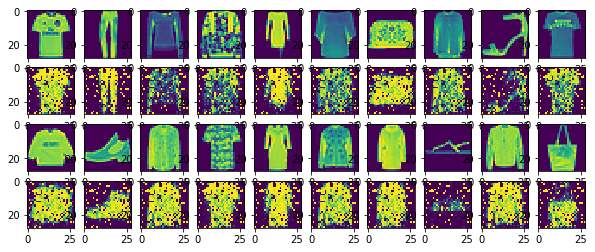

In [14]:
# Compare original images with their reconstructions
f, a = plt.subplots(4, 10, figsize=(10, 4))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(features_test[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    a[2][i].imshow(np.reshape(features[i], (28, 28)))
    a[3][i].imshow(np.reshape(encode_decode_trn[i], (28, 28)))